# Analyzing Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Both datasets were obtained from Dataquest as part of the [Data Analyst in Python course](https://www.dataquest.io/path/data-analyst/). Dataquest made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction
- What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### 1. Exploring both datasets

In [1]:
# importing relevant libralies and reading both datasets
import numpy as np
import pandas as pd
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
# exploring basic information on dataset
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
# exploring null values in a dataset
null_count_dete = dete_survey.isnull().sum()
print(null_count_dete)

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
# exploring basic information on dataset
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
# exploring null values in a dataset
null_count_tafe = tafe_survey.isnull().sum()
print(null_count_tafe)

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


Below are the first observations from initial exploration of the dataset:
- although the datasets used the same survey template, they differ slightly in terms of answers and columns names
- there is a lot of missing values
- both datasets have some columns that are not needed for the analysis

Let's start by reading `dete_survey` again, but this time setting `Not Stated` values as `NaN`. Then, we will drop columns that we won't use in the analysis.

### 2. Data cleaning - dropping the columns that are not needed for the analysis

In [8]:
# reading dete dataset again with Not Stated values as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [9]:
# dropping irrelevant columns in dete_survey
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [10]:
# dropping irrelevant columns in tafe_survey
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

The next issue to tackle are columns names across two datasets. Because we want to eventally combine them, they need to be unified first. Starting with `dete_survey`, we will make three adjustments:
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

### 3. Data cleaning - renaming the column names

In [11]:
# cleaning of columns names using lower(), strip() and replace() methods
dete_survey_updated.columns = [col.lower().strip().replace(' ', '_') for col in dete_survey_updated.columns]

In [12]:
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


After dealing with `dete_survey` columns names, let's take a look at `tafe_survey`.

In [13]:
# create a dictionary mapping new column names
new_column_names = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

# use the `rename` function and replace the old column names with the new ones
tafe_survey_updated.rename(columns=new_column_names, inplace=True)

In [14]:
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


Next, we will take a look at unique values in the `separationtype` columns in each dataframe. We will start the analysis with respondents who resigned, and hence their separation type contains the string `Resignation`.

### 4. Data cleaning - filtering the datasets to include in the analysis only the employees who resigned 

In [15]:
# exploring unique values regarding the separation type using value_counts
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
# exploring unique values regarding the separation type using value_counts
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [17]:
# filtering the dete dataset to include only data for survey respondents who have a Resignation separation type
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()

In [18]:
# filtering the tafe dataset to include only data for survey respondents who have a Resignation separation type
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)].copy()

For both datasets, we selected only the data for survey respondents who have indicated `Resignation` as a `separationtype`.

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). We'll focus on verifying that the years in the cease_date and dete_start_date columns make sense. More specifically, we will look into two assumptions below:

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

### 5. Ensuring data quality - veryfing logic in the date columns

#### 5.1 date in `dete_resignations`

In [19]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [20]:
# extracting the year value from cease_date columns by splitting the strings on the '/' character and selecting the last column
dete_resignations['year'] = dete_resignations['cease_date'].str.split('/').str[-1]

# using the astype method to convert the year column to a float
dete_resignations['year'] = dete_resignations['year'].astype(float)

In [21]:
dete_resignations['year'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: year, dtype: int64

In [22]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

#### 5.2 date in `tafe_resignations`

In [23]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

It doesn't seem that there are any specific issues with years columns. Now, let's take a look at the lenght of service of employees. As a reminder, our goal is to asnwer the following question: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

For `tafe_resignations`, there is a relevant column already, called `institute_service`. For the `dete_resignations` though, we need to create it, based on the existing columns.

### 6. Data cleaning - creating a new column in DETE showing the lenght of service of employees

In [24]:
# creating the institute_service column in dete_resignations and subtracting the start date from the cease date to get the length of service
dete_resignations['institute_service'] = dete_resignations['year'] - dete_resignations['dete_start_date']

In [25]:
# exploring the newly-created column
dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

### 7. Data cleaning - identifying the dissatisfied employees in both datasets

Now, let's identify all the employees who resigned because they were dissatisfied. These are the columns that we will use:

1. `tafe_survey_updated`:
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

2. `dete_survey_updated`:
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column, called `dissatisfied`, that will be created for each dataset separetely. The newly created column will include:
- `True` value for employees whose resiged due to dissatisfaction
- `False` value for employees whose reisgned due to other reasons

#### 7.1 Dissatisfaction in tafe_survey

In [26]:
# exploring the values in Contributing Factors. Dissatisfaction column
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
# exploring the values in Contributing Factors. Job Dissatisfaction
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [28]:
# creating function called update_vals to update the values in these two columns so that each only contains True, False, or NaN values
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

We created a function `update_vals` that transforms the values in the `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` columns to only `True`, `False`, or `NaN`. This is important because it simplifies the values in these columns to a consistent and interpretable format. The transformation is done based on the observations in the dataset, where a value of `-` is interpreted as `False` (i.e., the contributing factor did not play a role in the resignation) and any other non-null value is interpreted as `True` (i.e., the contributing factor did play a role in the resignation).

We then apply this function to the appropriate columns in the `tafe_resignations` dataframe using the `applymap()` function, which applies a function to each element of the dataframe.

In [29]:
# using applymap method to apply the function above to both columns
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations_up[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [30]:
# veryfing the results
tafe_resignations_up['Contributing Factors. Dissatisfaction'].value_counts()

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
# veryfing the results
tafe_resignations_up['Contributing Factors. Job Dissatisfaction'].value_counts()

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [32]:
# creating a boolean series with `True` value corresponding to 'True' value from any of two columns above
tafe_dissatisfied = tafe_resignations_up[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna = False)

In [33]:
tafe_dissatisfied.value_counts()

False    241
True      99
dtype: int64

In [34]:
# creating a new columns called 'dissatisfied'
tafe_resignations_up['dissatisfied'] = tafe_dissatisfied.copy()

#### 7.2 Dissatisfaction in dete_survey

In [35]:
# creating a new DataFrame 'dete_dissatisfied_df' by subsetting 'dete_resignations'
dete_dissatisfied_df = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']]

In [36]:
# creating a boolean Series where each value corresponds to a row in the dete_dissatisfied_df
dete_dissatisfied = dete_dissatisfied_df.any(axis = 1, skipna = False)

In [37]:
# creating a new column in 'dete_resignations' named 'dissatisfied', and filling it with the values from the 'dete_dissatisfied' series
dete_resignations['dissatisfied'] = dete_dissatisfied.copy()

In [38]:
dete_resignations_up = dete_resignations.copy()

It's time to combine two datasets and aggregate the data according to the `institute_service` column.

### 8. Combining two datasets

In [39]:
# adding a column to each dataframe that will allow us to easily distinguish between the two
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [40]:
# combining two datasets using concat function
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [41]:
# exploring number of null values
combined.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

In [42]:
# dropping any columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1)

In [43]:
# exploring the dataset after the operations above
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    object 
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(1), object(8)
memory usage: 46.5+ KB


In [44]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.0,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.0,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,10.0,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE


In the next step, we will explore and clean the `institute_service` column that will be used for the analysis and answering the reserach questions. 

### 9. Data cleaning of `institute_service` (years of service) column

In [45]:
# exploring the institute_service column
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Let's categorize the values in the `institute_service` column using the definitions above. We will start with extracting years of service from each value in the `institute_service` column.

In [46]:
# changing the type to string
combined_updated['institute_service'] = combined_updated['institute_service'].astype("string")

C:\Users\witol\AppData\Local\Temp\ipykernel_21912\1039022397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = combined_updated['institute_service'].astype("string")


In [47]:
# importing the re library to work with regular expressions
import re

# writing a function to extract years; less than a year will be treated as full year, while 20+ years will be treated as 20 years; in case of a range, we will use their average
def extract_values(val):
    if pd.isna(val):
        return np.nan
    elif 'Less than 1 year' in val:
        return 1.0
    elif 'More than 20 years' in val:
        return 20.0
    else:
        # extracting all numbers (including decimals) from the string
        years = re.findall(r'\d+\.\d+|\d+', val)
        # if multiple years are found, return the average and if only a single year is found, return it
        if len(years) > 1:
            return (float(years[0]) + float(years[1])) / 2
        else:
            return float(years[0])

# applying the function to the 'institute_service'
combined_updated['institute_service'] = combined_updated['institute_service'].apply(extract_values)

C:\Users\witol\AppData\Local\Temp\ipykernel_21912\1604789799.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = combined_updated['institute_service'].apply(extract_values)


In [48]:
# exploring the values in the 'institute_service' following the data cleaning
combined_updated['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     95
1.5     64
2.0     14
3.0     20
3.5     63
4.0     16
5.0     23
5.5     33
6.0     17
7.0     13
8.0      8
8.5     21
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
15.5    26
16.0     5
17.0     6
18.0     5
19.0     3
20.0    17
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

Next, we'll map each value to one of the career stage definitions above.

### 10. Data cleaning - mapping the years of service to categories

In [49]:
# creating a function that maps each year value to one of the career stages
def service_category(val):
    if pd.isna(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val >= 3 and val < 7:
        return 'Experienced'
    elif val >= 7 and val < 10:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(service_category)

C:\Users\witol\AppData\Local\Temp\ipykernel_21912\631737712.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['institute_service'].apply(service_category)


In [50]:
# exploring the newly created column that includes lenght of service by category
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        142
Established     56
Name: service_cat, dtype: int64

In the last step, we created a new column that maps the lenght of the service to the catories. We can see that:
- New: Less than 3 years at a company; ; with 193 employees under this category
- Experienced: 3-6 years at a company; with 172 employees under this category
- Established: 7-10 years at a company; with 56 employees under this category
- Veteran: 11 or more years at a company; with 142 employees under this category

It's time to answer the initial reserach qestion!

### 11. Performing initial analysis

In [51]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    object 
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    float64
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
 10  service_cat        563 non-null    object 
dtypes: bool(1), float64(2), object(8)
memory usage: 51.6+ KB


In [52]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.0,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.0,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,10.0,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,12.0,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced


In [53]:
# creating pivot table that disaggregates dissatisfied employees by the service category
pivot_dissatisfied_category = combined_updated.pivot_table(values='dissatisfied', index='service_cat', aggfunc=np.mean, margins=True)

In [54]:
pivot_dissatisfied_category

,dissatisfied
service_cat,
Established,0.553571
Experienced,0.343023
New,0.295337
Veteran,0.471831
All,0.380107


<AxesSubplot:title={'center':'Employee Dissatisfaction by Service Category'}, ylabel='service_cat'>

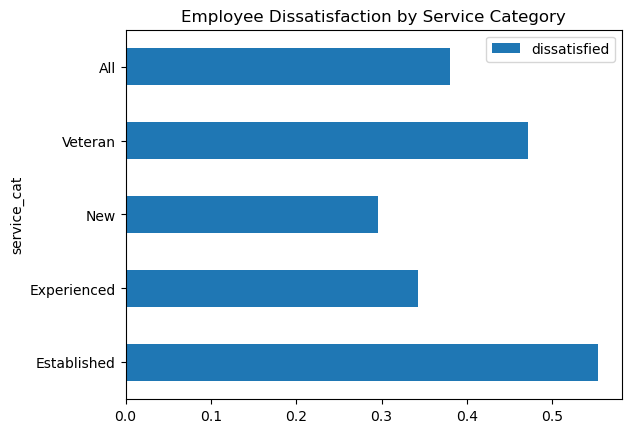

In [55]:
# plotting results
%matplotlib inline
pivot_dissatisfied_category.plot(kind='barh', title='Employee Dissatisfaction by Service Category')

Interestingly, **the main finding from the analysis is the fact that more experienced employees tend to resign due to dissatisfaction with work more often than the less experienced ones**. As presented on the graph above, 55% of employees working at company for 7-10 years and 47% of employees working at company for more than 11 years resigned due to dissatisfaction. At the same time, 30% of employees working at the company for less than 3 years resigned due to these reasons.